# Scikit-Learn 回归

* sklearn.linear_model.LinearRegression 线性回归模型类，用于建立和训练线性回归模型
* sklearn.preprocessing.PolynomialFeatures 特征预处理类，用于生成多项式特征，将原始特征的幂次组合以扩展特征空间，用于捕捉更复杂的非线性特征关系

## 聊聊回归

回归通常用于研究变量之间的关系,并可以用于预测趋势

**一元线性回归**是一种基本的统计分析方法，用于探究两个连续变量之间的关系。

“一元”表示模型中只有一个自变量 (independent variable)。自变量也叫解释变量 (explanatory variable) 或回归元 (regressor)、外生变量 (exogenous variables)、预测变量 (predictor variables)。本章后续还会介绍二元、多元回归。

“线性回归”则表明模型假设自变量与因变量之间存在线性关系

因变量 (dependent variable) 也叫被解释变量 (explained variable)、或回归子 (regressand)、内生变量(endogenous variable)、响应变量 (response variable)。

在一元线性回归中，我们试图找到一条直线，该直线最好地拟合了自变量和因变量之间的数据关系。

具体来说，我们要找到一条直线，使得所有数据点到这条直线的垂直距离之差 (残差) 平方和最小化(也有使用绝对距离之和作为误差计算的标准)。

残差项 (residuals) 也叫误差项 (error term)、干扰项 (disturbance term)或噪音项 (noise term)。图 2 中灰色线段便代表残差。使用差值的平方和,这种方法叫做**最小二乘法 (Ordinary Least Square, OLS)**。

线性回归并不适合所有回归分析；很多时候，我们还需要非线性回归。

**非线性回归**是指自变量和因变量之间存在着非线性关系的回归模型。在非线性回归中，自变量和因变量的关系不再是简单的线性关系，而可能是**多项式关系、指数关系、对数关系**等其他非线性形式。

## 一元线性回归

创建一个名为LR 的LinearRegression 对象，然后你可以使用这个对象来调用线性回归模型的方法，如
* 拟合数据
* 进行预测
* 评估模型性能

`coef_` 用来获取线性回归模型的系数。该属性返回一个数组，其中包含每个自变量对应的系数值，可以用于分析模型的特征重要性。一元线性回归,返回一个值. 二元返回两个,依此类推.

`intercept_` 用来获取线性回归模型的截距。该属性返回一个标量，表示线性回归模型的截距值。

对于误差分析:
如果**误差距离是按照 点 与预测直线垂直方向上的距离**,称这种回归模型为**正交回归**

正交回归和前文介绍的**主成分分析**有关。

正交回归的一种常见方法是主成分回归 (Principal Component Regression，PCR)，其中主成分分析 PCA 用于寻找数据中的主要方差方向，然后利用这些主成分进行回归。

[0.46927329]
0.9927899158697211


(-2.0, 8.0)

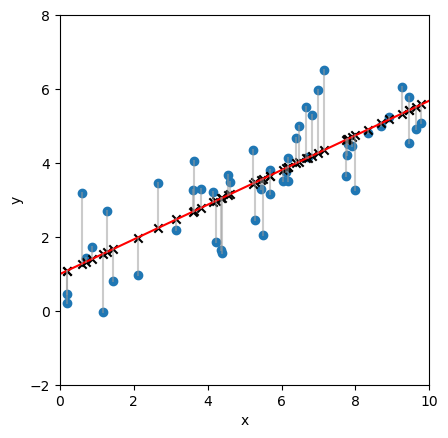

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 生成随机数据
num = 50
np.random.seed(0)
x_data = np.random.uniform(0,10,num)
y_data = 0.5 * x_data + 1 + np.random.normal(0, 1, num)

## x_data 一定得是二维数组,因此需要把它转成列向量
# print(x_data)
x_data = x_data.reshape((-1,1))
# print("after change")
# print(x_data)

data = np.column_stack([x_data,y_data])

lr = LinearRegression()
lr.fit(x_data, y_data)

print(lr.coef_)
print(lr.intercept_)

x_array = np.linspace(0,10,101).reshape((-1, 1))  # -1 代表让系统自己估算下行的个数
# 预测
predicted = lr.predict(x_array)

data_ = np.column_stack([x_data, lr.predict(x_data)])

fig, ax = plt.subplots()
ax.scatter(x_data, y_data)
ax.scatter(x_data, lr.predict(x_data), color = 'k', marker = 'x')
ax.plot(x_array, predicted, color = 'r')
ax.plot(([i for (i,j) in data_], [i for (i,j) in data]),   # 这个是画出差距线的
        ([j for (i,j) in data_], [j for (i,j) in data]),
        c=[0.6,0.6,0.6], alpha = 0.5)
ax.set_xlabel('x'); ax.set_ylabel('y')
ax.set_aspect('equal', adjustable='box')
ax.set_xlim(0,10); ax.set_ylim(-2,8)

## 二元线性回归

也是一种线性回归模型,其中有两个自变量和一个因变量,它旨在分析两个自变量和因变量之间的线性关系。

二元线性回归解析式在三维空间为一平面, x1 和 x2 对应于 y 的关系

有了二元线性回归，理解多元线性回归就很容易了。多元线性回归是一种线性回归的扩展形式，用于建立一个预测模型来描述多个输入特征与一个连续的目标输出之间的线性关系

slope:  [-2.94476755  1.97298145]
intercept:  0.974294437405637


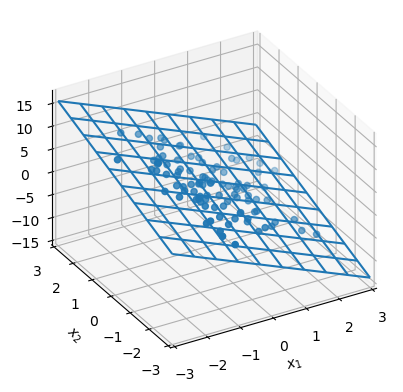

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# 线性回归模型,在 linear_model 内

# 先随机生成数据集
np.random.seed(0)
n_samples = 100
X = np.random.randn(n_samples, 2) # 函数的参数是指定生成数组的样式
y = -3 * X[: ,0] + 2 * X[:,1] + 1 + 0.5 * np.random.randn(n_samples)

# 创建线性回归模型并拟合数据
LR = LinearRegression()
y_predicted = LR.fit(X, y)  #fit 返回的就是一个 LinearRegression 模型,不过 LR 自己其实也会变化

slope = LR.coef_  # 斜率
print("slope: ", slope)
intercept = LR.intercept_ # 截距
print("intercept: ", intercept)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# 绘制三维样本散点
ax.scatter(X[:, 0], X[:,1], y)

# 生成回归平面的数据点
x1_grid, x2_grid = np.meshgrid(np.linspace(-3, 3, 10), np.linspace(-3, 3, 10))
# print("X1_grid:\n", x1_grid)
X_grid=np.column_stack((x1_grid.flatten(),x2_grid.flatten()))
# print("X_grid:\n", X_grid)  打印出来可以看到 X_grid 是 N*2 的形状,因此可以预测值

# 预测回归平面上的响应变量
y_pred = LR.predict(X_grid)
y_pred = y_pred.reshape(x1_grid.shape)
 

# 绘制回归平面
ax.plot_wireframe(x1_grid, x2_grid, y_pred)

ax.set_xlabel('$x_1$'); ax.set_ylabel('$x_2$')
ax.set_zlabel('y')
ax.set_xlim([-3,3]); ax.set_ylim([-3,3])
ax.set_proj_type('ortho'); ax.view_init(azim=-120, elev=30)

## 多项式回归

多项式回归 (polynomial regression) 是一种线性回归的扩展，它允许我们通过引入多项式 (例如，二次、三次、四次等) 来建模非线性关系.

在多项式回归中，我们不仅使用自变量的原始值，还将其不同阶数作为额外的特征，从而能够更好地拟合数据中非线性模式
> **即 x 的几次方也变成了一个变量!**
> y = b0 + b1x + b2x^2 + b3x^3 + ...

从函数图像角度来讲，**多项式回归曲线好比若干曲线叠加的结果**。

多项式回归的阶数影响着模型的灵活性。如图 16 所示，较低的阶数 (比如图 16 (a)、(b)) 可能无法很好地捕捉数据中的复杂关系，而较高的阶数可能会导致过度拟合。阶数越高，模型越能够适应训练数据，但也越容易在测试数据或实际应用中表现不佳。
> 记住这里说的多项式的阶数对于模型的影响
> 看下面代码, 使用多项式特征训练出来的模型,预测的时候也要丢进去待预测数据的多项式特征,否则就是线性回归了

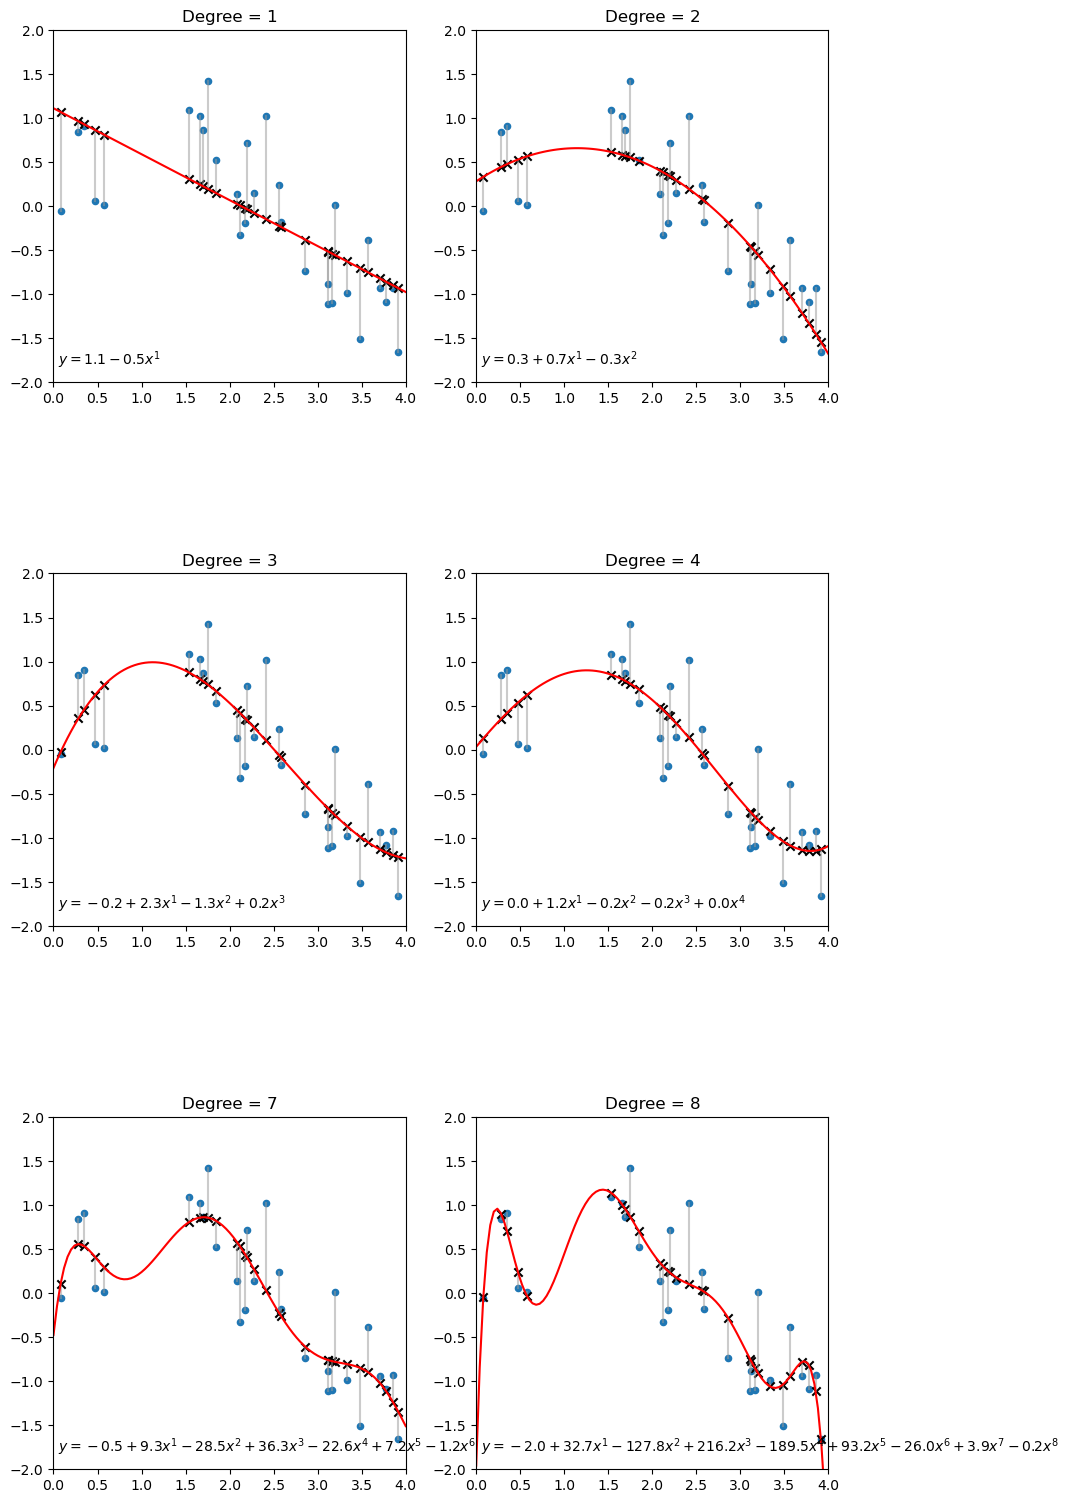

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# 生成随机数据
np.random.seed(0)
num = 30
X = np.random.uniform(0, 4, num)
y = np.sin(0.4*np.pi * X) + 0.4 * np.random.randn(num)
data = np.column_stack([X,y])

x_array = np.linspace(0,4,101).reshape(-1,1)  # 列向量
degree_array = [1,2,3,4,7,8]
fig, axes = plt.subplots(3,2,figsize=(10,20))
axes = axes.flatten()  # 返回的是一个 ax 的 ndArray,可以顺序访问了

for ax, degree_idx in zip(axes,degree_array):
    poly = PolynomialFeatures(degree = degree_idx) # 设置生成多项式特征的阶数
    X_poly = poly.fit_transform(X.reshape(-1, 1))  # 使用方式就是将 X 转成列向量,再丢进去 fit_transform


    # 训练线性回归模型
    poly_reg = LinearRegression()
    poly_reg.fit(X_poly, y)   #  可以看到,丢进去回归训练的也是 X_poly,而不是 X
    y_poly_pred = poly_reg.predict(X_poly)  # 预测的时候,也是丢进去 X_poly,而不是 X
    data_ = np.column_stack([X, y_poly_pred])  # 堆叠画图的时候,需要把 X 和 y_poly_pred 一起画出来,而不是 X_poly

    y_array_pred = poly_reg.predict(poly.fit_transform(x_array))

    # 绘制散点图
    ax.scatter(X, y, s=20)
    ax.scatter(X, y_poly_pred, marker = 'x', color='k')
    ax.plot(([i for (i,j) in data_], [i for (i,j) in data]),
            ([j for (i,j) in data_], [j for (i,j) in data]),
    c=[0.6,0.6,0.6], alpha = 0.5)

    ax.plot(x_array, y_array_pred, color='r') 
    ax.set_title('Degree = %d' % degree_idx)

    # 提取参数
    coef = poly_reg.coef_
    intercept = poly_reg.intercept_
    # 回归解析式
    equation = '$y = {:.1f}'.format(intercept)
    for j in range(1, len(coef)):
        equation += ' + {:.1f}x^{}'.format(coef[j], j)
    equation += '$'
    equation = equation.replace("+ -", "-")

    ax.text(0.05, -1.8, equation)
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlim(0,4)
    ax.grid(False)
    ax.set_ylim(-2,2)



从上面进行一个汇总,多项式的线性回归也是利用了 LinearRegression 这个类,只不过在训练的时候,使用了 PolynomialFeatures 这个类,将原始特征的幂次组合以扩展特征空间,用于捕捉更复杂的非线性特征关系.

传入给 PolynomialFeatures 的参数 degree 用于指定多项式的阶数。例如，degree=2 时，会生成一个二次多项式特征集，其中包含原始特征的平方。degree=3 时，会生成一个三次多项式特征集，其中包含原始特征的平方和立方。

对线性模型 fit 的时候,传入的 X 是经过 PolynomialFeatures 处理过的,而预测的时候,传入的 X 也要经过 PolynomialFeatures 处理过的,否则就是线性回归了.

注意 PolynomialFeatures 的 fit_transform 方法,它传入的参数和 fit 方法一样,必须是一个二维数组,而且每个特征都是一个数组,即使只有一个特征,也要写成二维数组的形式.

## 正则化:抑制过度拟合

**正则化** (regularization) 是一种用于抑制过度拟合的技术.它通过在损失函数中增加一个惩罚项 (penalty term) 来降低模型的复杂度。
> 所谓过度拟合，是指模型参数过多,或者结构过于复杂。

**正则项** (regularizer, regularization term, penalty term) 通常被加在**目标函数** (objective function) 当中。正则项可以让估计参数变小甚至为0，这一现象也叫**特征缩减** (shrinkage)。

以下是几种常见的正则化方法:
1. 岭回归 (Ridge Regression), L2 正则化. 有利于**减小模型参数的大小**.
2. 套索回归 (Lasso Regression), L1 正则化. 有利于**减小模型参数的个数**.
3. 弹性网络 (Elastic Net), L1 和 L2 正则化的混合. 它可以同时考虑两种正则化的效果.
> L1 个数, L2 大小

这些正则化技术可以应用于各种机器学习算法，包括线性回归、多项式回归、逻辑回归、支持向量机等，以帮助改善模型的泛化性能并提高模型的健壮性。

本节简单介绍如何用岭正则化(L2)简化多项式回归模型参数。

$y = -0.985 + 18.400x^1 -71.750x^2 + 122.612x^3 -108.324x^4 + 53.620x^5 -15.058x^6 + 2.243x^7 -0.138x^8$
$y = 0.026 + 3.491x^1 -13.188x^2 + 24.668x^3 -23.210x^4 + 12.008x^5 -3.515x^6 + 0.547x^7 -0.035x^8$
$y = 0.222 + 0.380x^1 + 0.149x^2 + 0.258x^3 -0.391x^4 + 0.203x^5 -0.093x^6 + 0.027x^7 -0.003x^8$
$y = 0.335 + 0.125x^1 + 0.132x^2 + 0.099x^3 + 0.019x^4 -0.048x^5 -0.033x^6 + 0.022x^7 -0.003x^8$
$y = 0.428 + 0.045x^1 + 0.064x^2 + 0.070x^3 + 0.049x^4 -0.008x^5 -0.065x^6 + 0.030x^7 -0.004x^8$
$y = 0.585 + 0.013x^1 + 0.020x^2 + 0.024x^3 + 0.019x^4 -0.004x^5 -0.029x^6 + 0.013x^7 -0.002x^8$


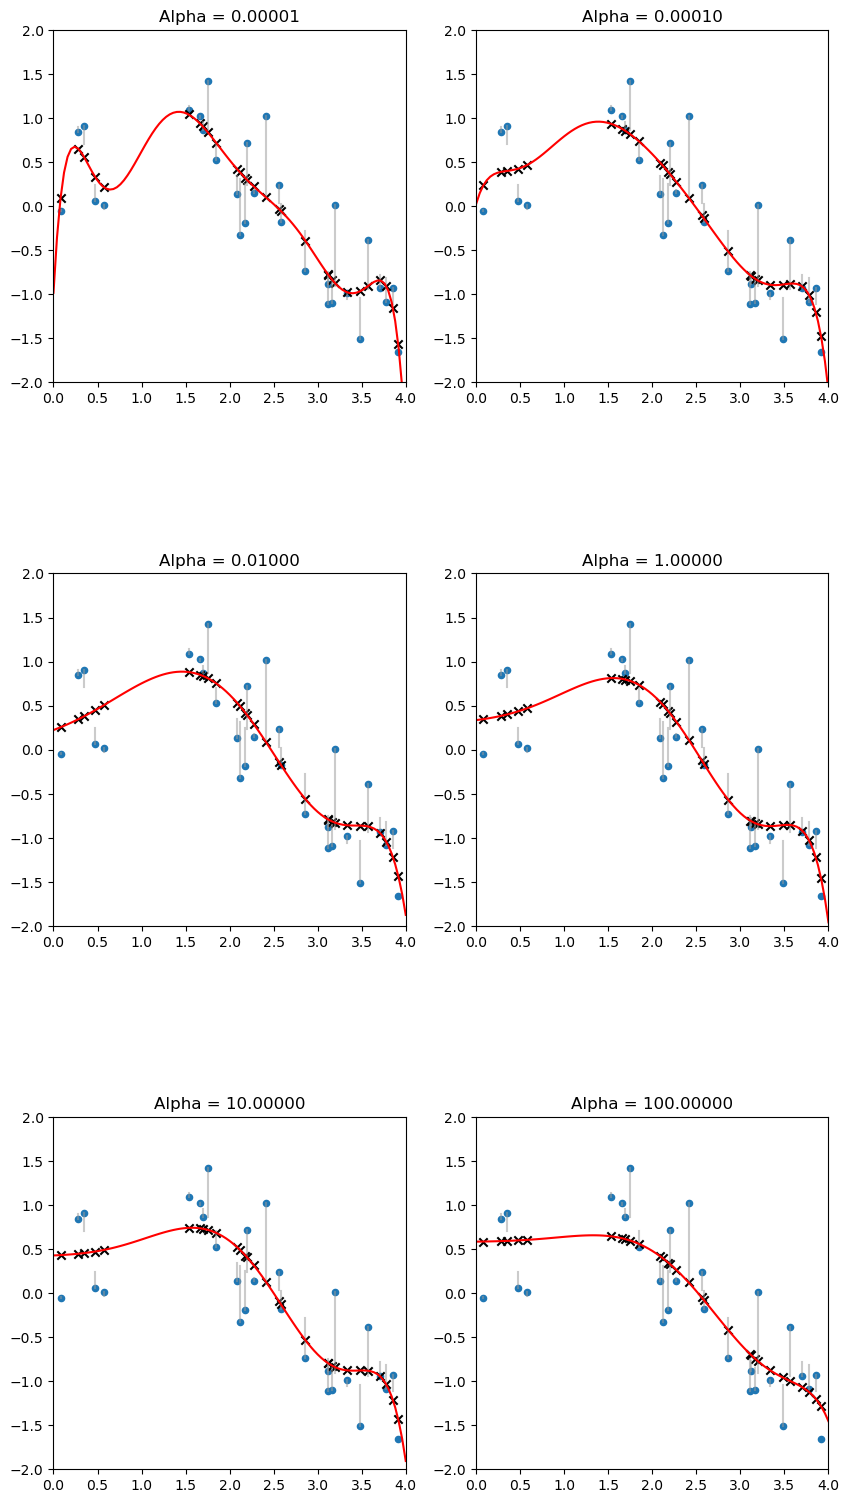

In [3]:
# 导入包
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

# 生成随机数据
np.random.seed(0)
num = 30
X = np.random.uniform(0, 4, num)
y = np.sin(0.4*np.pi * X) + 0.4 * np.random.randn(num)
data = np.column_stack([X,y])

x_array = np.linspace(0,4,101).reshape(-1,1)  # 列向量
degree = 8 # 多项式回归次数

# 将数据拓展成为 9 列
poly = PolynomialFeatures(degree = degree) # 设置生成多项式特征的阶数
X_poly = poly.fit_transform(X.reshape(-1, 1))  # 使用方式就是将 X 转成列向量,再丢进去 fit_transform

fig, axes = plt.subplots(3,2,figsize=(10,20))
axes = axes.flatten()  # 返回的是一个 ax 的 ndArray,可以顺序访问了

# 惩罚因子
alpha_array = [0.00001, 0.0001, 0.01, 1, 10, 100]

for ax, alpha_idx in zip(axes, alpha_array):
    # 训练岭回归模型
    ridge = Ridge(alpha = alpha_idx)
    ridge.fit(X_poly, y.reshape(-1,1))   #  可以看到,丢进去回归训练的也是 X_poly,而不是 X
    # 预测
    y_array_pred = ridge.predict(poly.fit_transform(x_array))
    y_poly_pred = ridge.predict(X_poly) # 预测的时候,也是丢进去 X_poly,而不是 X
    # 绘制散点图
    ax.scatter(X, y, s=20)
    ax.scatter(X, y_poly_pred, marker = 'x', color='k')
    # 绘制残差线
    ax.plot(([i for (i,j) in data], [i for (i,j) in data]),
            ([j for (i,j) in data], [j for (i,j) in data_]),
            c=[0.6,0.6,0.6], alpha = 0.5)
    
    ax.plot(x_array, y_array_pred, color='r')
    ax.set_title('Alpha = %.5f' % alpha_idx)

    # 提取参数
    coef = ridge.coef_[0]; # print(coef)
    intercept = ridge.intercept_[0]; # print(intercept)
    # 回归解析式
    equation = '$y = {:.3f}'.format(intercept)
    for j in range(1, len(coef)):
        equation += ' + {:.3f}x^{}'.format(coef[j], j)
    equation += '$'
    equation = equation.replace("+ -", "-")
    print(equation)
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlim(0,4); ax.set_ylim(-2,2); ax.grid(False)

    


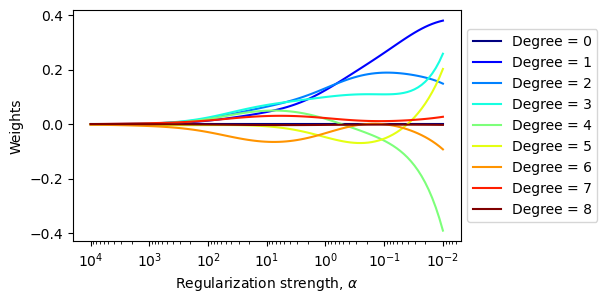

In [7]:
# 多项式回归模型参数随惩罚因子α变化,需要执行前一段代码
degrees = [0,1,2,3,4,5,6,7,8]
alphas = np.logspace(4, -2, 100)
colors = plt.cm.jet(np.linspace(0,1,len(degrees)))

coefs = []
for alpha_idx in alphas:
    ridge = Ridge(alpha=alpha_idx)
    ridge.fit(X_poly, y.reshape(-1,1))
    coefs.append(ridge.coef_[0])
coefs = np.array(coefs)

fig, ax = plt.subplots(figsize=(5,3))
for idx in range(9):
    ax.plot(alphas, coefs[:,idx], color = colors[idx])
ax.set_xscale("log") # 对数坐标
ax.set_xlim(ax.get_xlim()[::-1]) # 调转横轴
ax.set_xlabel(r"Regularization strength, $\alpha$")
ax.set_ylabel("Weights")
degrees = ['Degree = ' + str(d_i) for d_i in range(10)]
ax.legend(degrees,loc='center left', bbox_to_anchor=(1, 0.5))